<a href="https://colab.research.google.com/github/syafirawulandari/UTS_SIG/blob/main/UTS_KSI_120140142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP TRANSFER LEARNING
Pengklasifikasian hewan kucing atau anjing atau bukan keduanya

In [1]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

219330792/219330792 [==============================] - 2s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                

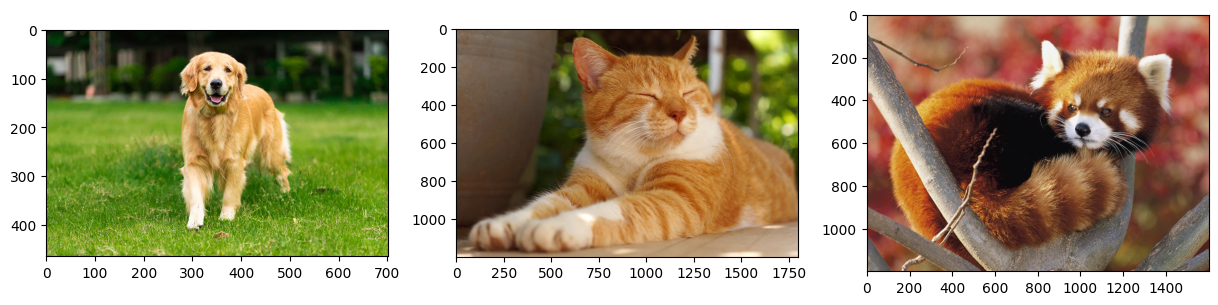

(3, 480, 480, 3)


In [2]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]

urls.append("https://d1vbn70lmn1nqe.cloudfront.net/prod/wp-content/uploads/2021/08/20065849/Ini-X-Gangguan-Kesehatan-yang-Umumnya-Dialami-Anjing-Golden.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://wallpaperaccess.com/full/3396763.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

VGG 16 memiliki target 1000 kelas 
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

Kelas anjing: 151 (Chihuahua) - 268 (Mexican hairless)

Kelas kucing: 281 (tabby cat) - 287 (lynx) 



In [3]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ): #rentang kelas anjing antara 151-268 pada VGG 16
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) : #rentang kelas kucing antara 151-268 pada VGG 16
      print("Kucing")
  else:
      print("Bukan Anjing atau Kucing")

1/1 [==============================] - 13s 13s/step
Anjing
Kucing
Bukan Anjing atau Kucing


In [ ]:
yh.shape

(11, 1000)

In [26]:
yh[0]

array([9.01961830e-05, 1.42869249e-04, 8.87611532e-05, 1.73951892e-04,
       1.43369340e-04, 2.00533657e-04, 2.79782573e-04, 1.61275995e-04,
       2.82021705e-04, 1.93267071e-04, 1.42751436e-04, 1.60146577e-04,
       1.12842470e-04, 1.50649954e-04, 1.69160587e-04, 2.67703639e-04,
       1.63952791e-04, 1.60603420e-04, 2.93781864e-04, 7.25448554e-05,
       1.99294605e-04, 1.61507938e-04, 1.79300914e-04, 2.87558330e-04,
       1.76423506e-04, 1.38861767e-04, 1.03243510e-04, 1.28567423e-04,
       1.11616231e-04, 2.30845631e-04, 1.27712978e-04, 1.10903631e-04,
       8.52283410e-05, 1.41879165e-04, 2.93847144e-04, 2.15817912e-04,
       1.86038320e-04, 1.08269174e-04, 1.80062096e-04, 1.51420696e-04,
       1.25112900e-04, 7.96982713e-05, 1.28284388e-04, 1.61005359e-04,
       1.05171217e-04, 1.48585445e-04, 1.59101066e-04, 1.14150629e-04,
       1.01162528e-04, 1.96338675e-04, 2.06715078e-04, 1.55712056e-04,
       1.14079339e-04, 1.02582104e-04, 1.06093481e-04, 1.07497537e-04,
      

In [29]:
np.argmax(yh[1])

282